In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ompy as om
import logging
import pandas as pd
import json

import scipy as sp
#%matplotlib widget
from ipywidgets import widgets #interact, interactive, fixed, interact_manual

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


In [2]:
from ROOT import TF1, TMultiGraph, TGraphErrors, Math

Welcome to JupyROOT 6.20/02


In [3]:
om.__full_version__;
np.random.seed(1382398)

In [4]:
plt.rcParams["figure.dpi"] = 80
plt.rcParams["errorbar.capsize"] = 5
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['font.size'] = 25
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.size'] = 12
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['text.usetex'] = True

Import $\gamma$SF and NLD from Oslo Method

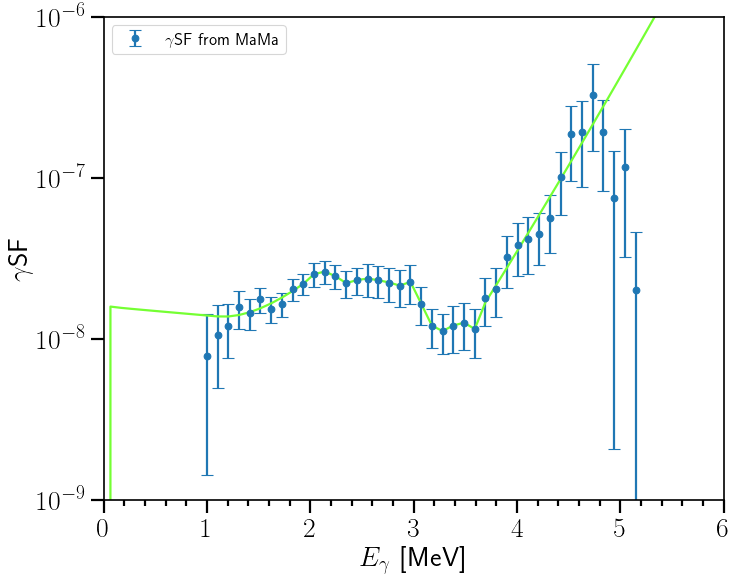

In [20]:
#reading files

#My normalization
#strength_nrm = np.genfromtxt("../analysis/mama/older_normalization/strength.nrm") #experimental gamma strength function
#discrete_levels = np.genfromtxt("../analysis/mama/older_normalization/rholev.cnt") #Discrete levels 
#rhopaw = np.genfromtxt("../analysis/mama/older_normalization/rhopaw.cnt") #experimental level density
#fermigas = np.genfromtxt("../analysis/mama/older_normalization/fermigas.cnt") #fermi gas extrapolation of nld
#trans_raw = np.genfromtxt("../analysis/mama/older_normalization/transext.nrm") #gsf extrapolation

strength_nrm = np.genfromtxt("../analysis/mama/29_JAN/strength.nrm") #experimental gamma strength function
discrete_levels = np.genfromtxt("../analysis/mama/29_JAN/rholev.cnt") #Discrete levels 
rhopaw = np.genfromtxt("../analysis/mama/29_JAN/rhopaw.cnt") #experimental level density
fermigas = np.genfromtxt("../analysis/mama/29_JAN/fermigas.cnt") #fermi gas extrapolation of nld
trans_raw = np.genfromtxt("../analysis/mama/29_JAN/transext.nrm") #gsf extrapolation

strength_nrm = np.genfromtxt("../analysis/mama/29_JAN_2/strength.nrm") #experimental gamma strength function
discrete_levels = np.genfromtxt("../analysis/mama/29_JAN_2/rholev.cnt") #Discrete levels 
rhopaw = np.genfromtxt("../analysis/mama/29_JAN_2/rhopaw.cnt") #experimental level density
fermigas = np.genfromtxt("../analysis/mama/29_JAN_2/fermigas.cnt") #fermi gas extrapolation of nld
trans_raw = np.genfromtxt("../analysis/mama/29_JAN_2/transext.nrm") #gsf extrapolation

#Magne's normalization
#strength_nrm = np.genfromtxt("../analysis/mama/U233_12jan2021/U233_dRhoup/strength.nrm") #experimental gamma strength function
#discrete_levels = np.genfromtxt("../analysis/mama/U233_12jan2021/U233_dRhoup/rholev.cnt") #Discrete levels 
#rhopaw = np.genfromtxt("../analysis/mama/U233_12jan2021/U233_dRhoup/rhopaw.cnt") #experimental level density
#fermigas = np.genfromtxt("../analysis/mama/U233_12jan2021/U233_dRhoup/fermigas.cnt") #fermi gas extrapolation of nld
#trans_raw = np.genfromtxt("../analysis/mama/U233_12jan2021/U233_dRhoup/transext.nrm") #gsf extrapolation

#Magne's Normalization 
#strength_nrm = np.genfromtxt("../analysis/mama/U233_12jan2021/U233/strength.nrm") #experimental gamma strength function
#discrete_levels = np.genfromtxt("../analysis/mama/U233_12jan2021/U233/rholev.cnt") #Discrete levels 
#rhopaw = np.genfromtxt("../analysis/mama/U233_12jan2021/U233/rhopaw.cnt") #experimental level density
#fermigas = np.genfromtxt("../analysis/mama/U233_12jan2021/U233/fermigas.cnt") #fermi gas extrapolation of nld
#trans_raw = np.genfromtxt("../analysis/mama/U233_12jan2021/U233/transext.nrm") #gsf extrapolation

#splitting arrays into data and errors
strength_nrm_split = np.array_split(strength_nrm,2)
gsf_om = strength_nrm_split[0]
gsf_om_error = strength_nrm_split[1]

rhopaw_split = np.array_split(rhopaw, 2)
nld_om = rhopaw_split[0]
nld_om_error = rhopaw_split[1]

#variables for this experiment
a0 = -0.8671 #calibration constants
a1 = 0.1037
Sn = 5.762
rhoSn = 28.07e6
rhoSn_error = 7.02e6
Eg_min = 999.9
Eg_max = 5252


#making energy array for gsf
n_gsf = len(gsf_om)
energy_gsf_om = np.zeros(n_gsf)
for i in range(n_gsf):
    energy_gsf_om[i] = a0 + a1*i

#making energy array for nld
n_fermi = len(fermigas)
energy_nld_om = np.zeros(n_fermi)
for i in range(n_fermi):
    energy_nld_om[i] = a0 + a1*i

#finding cutting index for plotting CT extrapolation
n0_CT = np.argmin(abs(energy_nld_om-3.0))
n1_CT = np.argmin(abs(energy_nld_om-Sn-0.5))

n_trans_raw=len(trans_raw)
gsf_extrapolation=np.zeros(n_trans_raw)
energy_gsf_extrapolation=np.zeros(n_trans_raw)
for i in range(n_trans_raw):
    energy_gsf_extrapolation[i] = a0 + a1*i
    gsf_extrapolation[i] = trans_raw[i]/(2*3.14*energy_gsf_extrapolation[i]**3)
    

fig, ax = plt.subplots()

#mama-analysis
ax.errorbar(x=energy_gsf_om, y=gsf_om, yerr=gsf_om_error, marker='o', linestyle='', label=' $\gamma$SF from MaMa')

#extrapolation from mama-analysis
plt.plot(energy_gsf_extrapolation[:80], gsf_extrapolation[:80], color="#75FF33")

ax.set_ylim(1e-9, 1e-6)
ax.set_xlim(0, 6)
ax.set_yscale('log')
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_xlabel('$E_\gamma$  [MeV]')
ax.set_ylabel('$\gamma$SF')
ax.legend(fontsize=15)

fig.show()


Import $\gamma$SF and NLD from OmPy

In [21]:
def read_ompy(datetime):
    """
    Read data from read_write_ompy() function in OmPy analysis.
    as well as parameters from the README.txt file
    
    Values stored in value_array:
    value_array = [energy_gsf, gsf_median, gsf_error, 
                    energy_nld, nld_median, nld_error,
                    keV_per_bin, Ex_min, Ex_max, Eg_min,
                    Eg_max, Gg, Gg_err, rhoSn, rhoSn_err]
    """
    path = '../analysis/OmPy/normalized_data/U233_2021-'+datetime+'/data_for_analysis.csv'
    dataFrame = pd.read_csv(path)

    #energy_gsf = dataFrame.iloc[:,1]
    #gsf_median = dataFrame.iloc[:,2]
    #gsf_error = dataFrame.iloc[:,3]
    #energy_nld = dataFrame.iloc[:,4]
    #nld_median = dataFrame.iloc[:,5]
    #nld_error = dataFrame.iloc[:,6]
        
    return dataFrame


Import and convert experimental data from EXFOR

In [22]:
with open('exfor_data/u233_g_x.json') as K:
    data_U233 = json.load(K)
datasets_U233=data_U233["datasets"]




def cs_to_gsf(Eg, data):
    # input in MeV and milibarn -> use this conversion factor.
    exp = 8.6737e-8 # DOBBELTSJEKK TALLET! # pi**2 * hbar**2 * c**2
    return data*exp/Eg

def extract_JSON(data, x_i,y_i,yerror_i):
    """ Extracting data from input files from MAMA, adding them to useful arrays."""
    x = []; y = [] ; yerror = []

    for j in range(len(data)):
        y.append(data[j][y_i]) # MeV
        yerror.append(data[j][yerror_i]) # MeV
        x.append(data[j][x_i])

    x = np.array(x) ; y = np.array(y) ; yerror = np.array(yerror)
    return x,y,yerror



energy_exp1, gsf_exp1, gsf_exp1_error =  extract_JSON(datasets_U233[0]['data'], 5, 0, 1)
gsf_exp1 = cs_to_gsf(energy_exp1, gsf_exp1)
gsf_exp1_error = cs_to_gsf(energy_exp1, gsf_exp1_error)

#remove first two points, that drop at Sn
#energy_exp1 = energy_exp1[2:]
#gsf_exp1 = gsf_exp1[2:]
#gsf_exp1_error = gsf_exp1_error[2:]

"Does_it_work.cpp" 

Script to check the quality of the extracted
level density and strength function
by plotting exp. and calculated f.g. spectra
written by: ACL. June 7, 2012
Translated to Python January 2020 (tellefs)

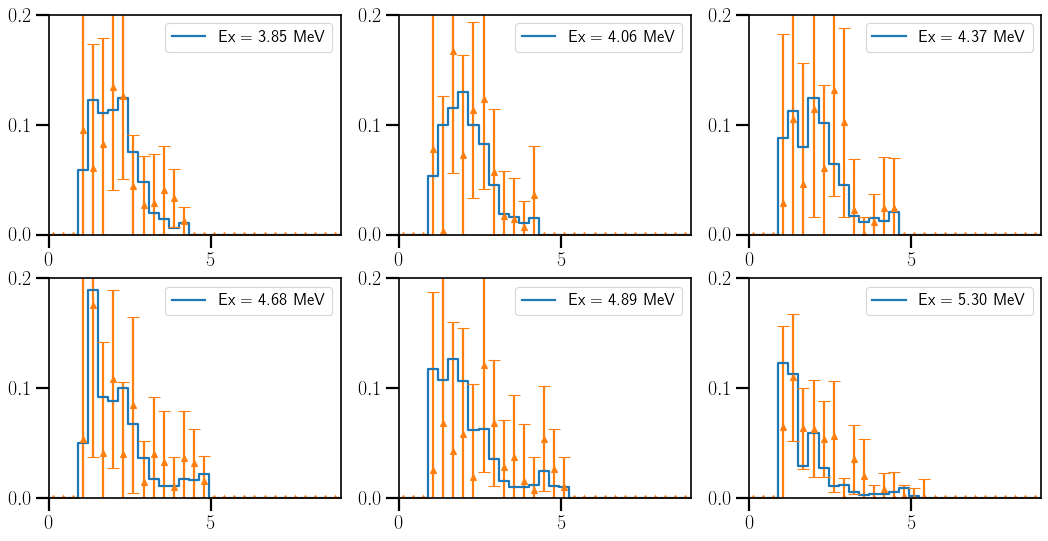

In [23]:
fg_theo_file = '../analysis/mama/29_JAN/fgteo.rsg'
fg_exp_file = '../analysis/mama/29_JAN/fg.rsg'
fg_exp_err_file = '../analysis/mama/29_JAN/fgerr.rsg'

#Magne's normalization
#fg_theo_file = '../analysis/mama/U233_12jan2021/U233_dRhoup/fgteo.rsg'
#fg_exp_file = '../analysis/mama/U233_12jan2021/U233_dRhoup/fg.rsg'
#fg_exp_err_file = '../analysis/mama/U233_12jan2021/U233_dRhoup/fgerr.rsg'

#fg_theo_file = '../analysis/mama/U233_12jan2021/U233/fgteo.rsg'
#fg_exp_file = '../analysis/mama/U233_12jan2021/U233/fg.rsg'
#fg_exp_err_file = '../analysis/mama/U233_12jan2021/U233/fgerr.rsg'

#set new rcParams. Need to reset after script to keep settings during program,
plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams['font.size'] = 18


def read_rsg(filename):
    infile = open(filename, 'r')
    matrix = []
    
    #extract calibration parameters:
    count = 0
    for line in infile:
        values = line.split()
        if not(values):
            count +=1
            continue
        elif line.startswith('!CALIBRATION'):
            values = line.split(',')
            x_cal = values[1:4]
            y_cal = values[4:7]
            for i in range(len(x_cal)):
                x_cal[i] = float(x_cal[i])*1e-3 #convert to float, convert from keV to MeV
                y_cal[i] = float(y_cal[i])*1e-3
            count+=1
        elif line.startswith('!DIMENSION'):
            values = line.split(':')
            x_dim = int(values[1].split(',')[0])
            y_dim = int(values[2])
            count+=1
        elif line.startswith('!'):
            count +=1
            continue
        else:
            for i in range(len(values)):
                values[i] = float(values[i])
            matrix.append(values)
            count +=1
            
    matrix = om.Matrix(matrix)
    
    infile.close()
    return matrix, x_cal, y_cal, x_dim, y_dim

fg_exp, x_cal_exp, y_cal_exp, x_dim_exp, y_dim_exp= read_rsg(fg_exp_file)
fg_exp_error, x_cal_exp_error, y_cal_exp_error, x_dim_exp_error, y_dim_exp_error = read_rsg(fg_exp_err_file)
fg_theo, x_cal_theo, y_cal_theo, x_dim_theo, y_dim_theo = read_rsg(fg_theo_file)

bin1, bin2, bin3, bin4, bin5, bin6 = 13, 14, 15, 16, 17, 18

bins = [45, 47, 50, 53, 55, 59,]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for i in range(len(bins)):
    bin_no = bins[i]
    fg_theo_copy = fg_theo.copy()
    fg_theo_copy.cut('Ex', bin_no, bin_no+2)
    fg_theo_copy.Eg = x_cal_theo[0] + x_cal_theo[1]*fg_theo_copy.Eg + x_cal_theo[2]*fg_theo_copy.Eg**2
    fg_theo_copy.Ex = y_cal_theo[0] + y_cal_theo[1]*fg_theo_copy.Ex + y_cal_theo[2]*fg_theo_copy.Ex**2
    theo_y, theo_x = fg_theo_copy.projection('Eg')
    
    
    fg_exp_copy = fg_exp.copy()
    fg_exp_copy.cut('Ex', bin_no, bin_no+2)
    fg_exp_copy.Eg = x_cal_exp[0] + x_cal_exp[1]*fg_exp_copy.Eg + x_cal_exp[2]*fg_exp_copy.Eg**2
    fg_exp_copy.Ex = y_cal_exp[0] + y_cal_exp[1]*fg_exp_copy.Ex + y_cal_exp[2]*fg_exp_copy.Ex**2
    exp_y, exp_x = fg_exp_copy.projection('Eg');
    
    fg_exp_error_copy = fg_exp_error.copy()
    fg_exp_error_copy.cut('Ex', bin_no, bin_no+2)
    fg_exp_error_copy.Eg = x_cal_exp_error[0] + x_cal_exp_error[1]*fg_exp_error_copy.Eg + x_cal_exp_error[2]*fg_exp_error_copy.Eg**2
    fg_exp_error_copy.Ex = y_cal_exp_error[0] + y_cal_exp_error[1]*fg_exp_copy.Ex + y_cal_exp_error[2]*fg_exp_error_copy.Ex**2
    exp_err_y, exp_err_x = fg_exp_error_copy.projection('Eg');
    
    #cut arrays to show lesser points
    theo_y = theo_y[0:-1:3]
    theo_x = theo_x[0:-1:3]
    exp_y = exp_y[0:-1:3]
    exp_x = exp_x[0:-1:3]
    exp_err_y = exp_err_y[0:-1:3]
    exp_err_x = exp_err_x[0:-1:3]
    
    current_Ex = y_cal_theo[0] + y_cal_theo[1]*(bin_no+0.5) + y_cal_theo[2]*(bin_no+0.5)**2
    axes[i].step(theo_x, theo_y, where='mid', label='Ex = %.2f MeV'%current_Ex)
    
    
    axes[i].errorbar(exp_x, exp_y, yerr=exp_err_y, marker='^', linestyle='')
    axes[i].legend(fontsize=15)
    
    
    
    axes[i].set_xlim(0, 9)
    axes[i].set_ylim(0, 0.2)
    
fig.show()


#reset rcParams
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['font.size'] = 25

Comparison with theorietical GEDR models (Giant Electric Dipole Resonance)

Fit to resonances of gsf

In [24]:
#Declaring fit functions

def SLo(E_gamma, Gamma_r, E_r, sigma_r):
    """
    Standard Lorentzian
    E_gamma = The gamma-energy on the x-axis
    Gamma_r = 
    E_r =
    sigma_r =
    """
    factor = 8.674e-8
    denominator = (E_gamma**2 - E_r**2)**2 + (Gamma_r**2 * E_gamma**2)
    
    return factor * sigma_r * Gamma_r**2 * E_gamma / denominator

def Gamma_k(E_gamma, Gamma_r, E_r, T_f):
    """
    E_gamma = The gamma-energy on the x-axis
    Gamma_r = 
    E_r =
    sigma_r =
    """
    return Gamma_r * (E_gamma**2 + (2*np.pi*T_f)**2) / (E_r**2)

def GLo(E_gamma, Gamma_r, E_r, sigma_r, T_f):
    """
    Generalized Lorentzian
    E_gamma = The gamma-energy on the x-axis
    Gamma_r = 
    E_r =
    sigma_r = 
    T_f = 
    """
    factor = 8.674e-8
    A = E_gamma * Gamma_k(E_gamma, Gamma_r, E_r, T_f) / ( (E_gamma**2 - E_r**2)**2 + (E_gamma * Gamma_k(E_gamma, Gamma_r, E_r, T_f))**2 )
    B = 0.7 * Gamma_k(E_gamma, Gamma_r, E_r, T_f) / (E_r**3)
    
    GLo = factor * sigma_r * Gamma_r * (A + B)
    return GLo

def FitFunctionStrength(x, par):
    """
    All different resonances and parameters of the fit to the experimental strength function
    GLo1 and GLo2 parameters are for the two peaks of the GDR
    pyg1 and pyg2 are for the two peaks of the pygme resonances
    SR are for the Scissor Resonance
    
    E_gamma = The gamma-energy on the x-axis
    Gamma_r_* = 
    E_r_* = 
    sigma_r_* = 
    T_f = Constant temperature for the GLo fits.
    
    """
    E_gamma = x[0]
    
    Gamma_r_GLo1 = par[0]
    E_r_GLo1 = par[1]
    sigma_r_GLo1 = par[2]
    
    Gamma_r_GLo2 = par[3]
    E_r_GLo2 = par[4]
    sigma_r_GLo2 = par[5]
    
    T_f_GLo = par[6]
    
    Gamma_pyg1 = par[7]
    E_pyg1 = par[8]
    sigma_pyg1 = par[9]
    
    Gamma_pyg2 = par[10]
    E_pyg2 = par[11]
    sigma_pyg2 = par[12]
    
    Gamma_SR = par[13]
    E_SR = par[14]
    sigma_SR = par[15]
    
    GLo1 = GLo(E_gamma, Gamma_r_GLo1, E_r_GLo1, sigma_r_GLo1, T_f)
    GLo2 = GLo(E_gamma, Gamma_r_GLo2, E_r_GLo2, sigma_r_GLo2, T_f)
    SLo_pyg1 = SLo(E_gamma, Gamma_pyg1, E_pyg1, sigma_pyg1)
    SLo_pyg2 = SLo(E_gamma, Gamma_pyg2, E_pyg2, sigma_pyg2)
    SLo_SR = SLo(E_gamma, Gamma_SR, E_SR, sigma_SR)
    
    return GLo1 + GLo2 + SLo_pyg1 + SLo_pyg2 + SLo_SR

def FitFunctionE1(x, par):
    E_gamma = x[0]
    Gamma_r_GLo1 = par[0]
    E_r_GLo1 = par[1]
    sigma_r_GLo1 = par[2]
    Gamma_r_GLo2 = par[3]
    E_r_GLo2 = par[4]
    sigma_r_GLo2 = par[5]
    T_f = par[6]
    return GLo(E_gamma, Gamma_r_GLo1, E_r_GLo1, sigma_r_GLo1, T_f) + GLo(E_gamma, Gamma_r_GLo2, E_r_GLo2, sigma_r_GLo2, T_f)

def FitPygmy(x, par):
    E_gamma = x[0]
    Gamma = par[0]
    E = par[1]
    sigma = par[2]
    return SLo(E_gamma, Gamma, E, sigma)

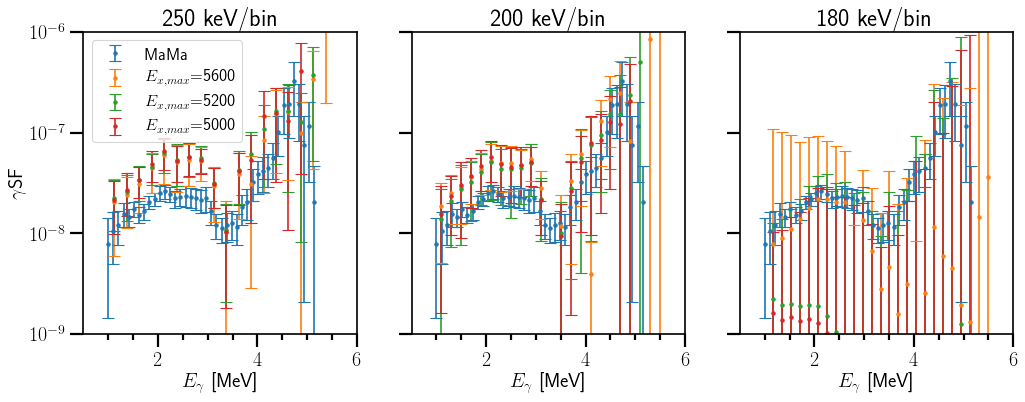

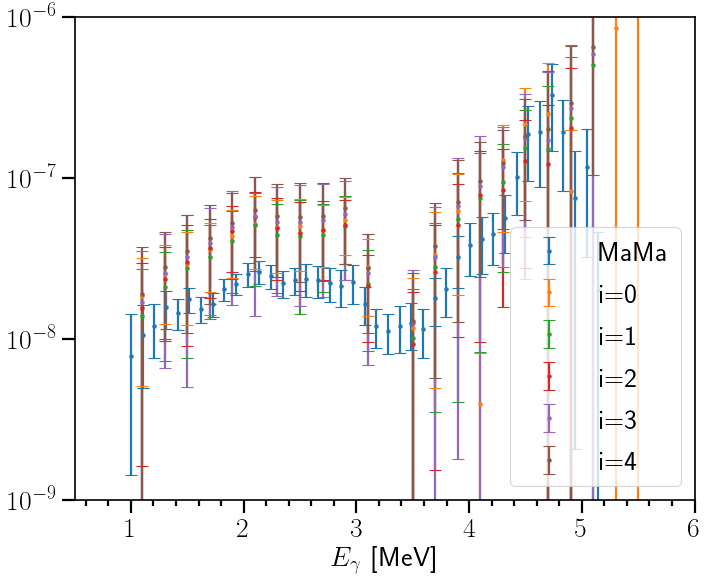

In [35]:
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 1.5

fig, (ax_250, ax_200, ax_180) = plt.subplots(1,3)
axes = [ax_250, ax_200, ax_180]
titles = ['250 keV/bin', '200 keV/bin', '180 keV/bin']
#extract ompy data via function above
datetimes_250 = ['01-27_07:47:14', '01-26_20:27:09', '01-26_22:11:04']
datetimes_200 = ['01-26_18:54:24', '01-26_13:02:13', '01-26_17:31:53']
datetimes_180 = ['01-27_09:39:00', '01-27_11:13:55', '01-27_13:25:57']
Exmax_list = [5600, 5200, 5000]

ax_250.errorbar(x=energy_gsf_om, y=gsf_om, yerr=gsf_om_error, marker='.', linestyle='', label='MaMa')
ax_200.errorbar(x=energy_gsf_om, y=gsf_om, yerr=gsf_om_error, marker='.', linestyle='', label='MaMa')
ax_180.errorbar(x=energy_gsf_om, y=gsf_om, yerr=gsf_om_error, marker='.', linestyle='', label='MaMa')

#ax_250.plot(energy_gsf_extrapolation[:80], gsf_extrapolation[:80], color="#75FF33")
#ax_200.plot(energy_gsf_extrapolation[:80], gsf_extrapolation[:80], color="#75FF33")
#ax_180.plot(energy_gsf_extrapolation[:80], gsf_extrapolation[:80], color="#75FF33")

for i in range(3):
    Exmax = Exmax_list[i]
    DataFrame_250 = read_ompy(datetimes_250[i])
    DataFrame_200 = read_ompy(datetimes_200[i])
    DataFrame_180 = read_ompy(datetimes_180[i])
    ax_250.errorbar(x=DataFrame_250.iloc[:,10], y=DataFrame_250.iloc[:,11], yerr=DataFrame_250.iloc[:,12], 
                    marker='.', linestyle='', label='$E_{x,max}$=%.0i'%(Exmax))
    ax_200.errorbar(x=DataFrame_200.iloc[:,10], y=DataFrame_200.iloc[:,11], yerr=DataFrame_200.iloc[:,12], 
                    marker='.', linestyle='', label='$E_{x,max}$=%.0i'%(Exmax))
    ax_180.errorbar(x=DataFrame_180.iloc[:,10], y=DataFrame_180.iloc[:,11], yerr=DataFrame_180.iloc[:,12], 
                    marker='.', linestyle='', label='$E_{x,max}$=%.0i'%(Exmax))
    
for i in range(3):
    ax = axes[i]
    ax.set_title(titles[i])
    ax.set_ylim(1e-9, 1e-6)
    ax.set_xlim(0.5, 6)
    ax.set_yscale('log')
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.set_xlabel('$E_\gamma$  [MeV]')

#personal axis settings
ax_250.legend(fontsize=15)
ax_250.set_ylabel('$\gamma$SF')

ax_200.yaxis.set_ticklabels([])

ax_180.yaxis.set_ticklabels([])
fig.show()


ompyDataFrame = read_ompy(datetimes_250[2])

#deleting unphysical/very low strenght
energy_gsf_ompy = np.asarray(ompyDataFrame.iloc[:,10])
energy_gsf_ompy = np.delete(energy_gsf_ompy, [0])
gsf_ompy_median = np.asarray(ompyDataFrame.iloc[:,11])
gsf_ompy_median = np.delete(gsf_ompy_median, [0])
gsf_ompy_error = np.asarray(ompyDataFrame.iloc[:,12])
gsf_ompy_error = np.delete(gsf_ompy_error, [0])

#reset rcParams
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['font.size'] = 25
plt.rcParams['lines.linewidth'] = 2.0

datetimes = ['01-26_18:54:24', '01-26_13:02:13', '01-26_17:31:53', '01-29_14:55:31', '01-29_16:31:56']

fig, ax = plt.subplots()
ax.set_ylim(1e-9, 1e-6)
ax.set_xlim(0.5, 6)
ax.set_yscale('log')
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_xlabel('$E_\gamma$  [MeV]')

ax.errorbar(x=energy_gsf_om, y=gsf_om, yerr=gsf_om_error, marker='.', linestyle='', label='MaMa')

for i in range(len(datetimes)):
    DataFrame = read_ompy(datetimes[i])
    ax.errorbar(x=DataFrame.iloc[:,10], y=DataFrame.iloc[:,11], yerr=DataFrame.iloc[:,12], 
                    marker='.', linestyle='', label='i=%.0i'%i)

ax.legend()
fig.show()

Defining starting fit-parameters

In [26]:
#some root fitting initializer
Math.MinimizerOptions.SetDefaultMaxFunctionCalls(10000)
#Kopecky data
fEx = np.asarray([12.14E-08])
fEerr = np.asarray([3.92E-08])
fEene = np.asarray([3.9])
fEeneerr = np.asarray([0.00])
fMx = np.asarray([2.11E-08])
fMerr = np.asarray([0.78E-08])
fMene = np.asarray([4.4])
fMeneerr = np.asarray([0.0])
fE = TGraphErrors(1,fEene,fEx,fEeneerr,fEerr)
fM = TGraphErrors(1,fMene,fMx,fEeneerr,fMerr)

Fitting E1 resonances to Reduced berman data

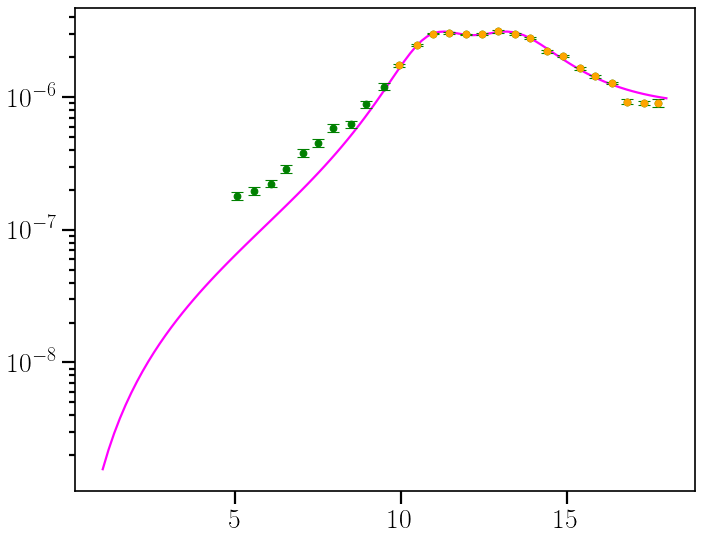

 FCN=78.8913 FROM HESSE     STATUS=OK             50 CALLS         375 TOTAL
                     EDM=3.11394e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Gamma_GLo1   3.00263e+00   1.50549e-01   1.26552e-04   2.40957e-03
   2  E_GLo1       1.13334e+01   5.80844e-02   6.97145e-05   2.11943e-03
   3  sigma_GLo1   3.05361e+02   9.02629e+00   8.98628e-03   3.91100e-05
   4  Gamma_GLo2   3.50471e+00   1.44219e-01   2.98932e-05   2.03963e-02
   5  E_GLo2       1.37140e+01   4.28895e-02   7.97170e-05  -1.01909e-03
   6  sigma_GLo2   3.15135e+02   1.20384e+01   1.19742e-02   1.98770e-05
   7  T_f          2.00000e-02   7.61620e-03   7.51891e-02  -6.91288e-06


In [27]:
#Define parameters & start values for the GLO
E_r_GLo1 = 11.4 # centroid (MeV)
Gamma_r_GLo1 = 2.0 # width (MeV)
sigma_r_GLo1 = 300 # peak cross section (mb)
E_r_GLo2 = 14.0 # centroid (MeV)
Gamma_r_GLo2 = 4.3 # width (MeV)
sigma_r_GLo2 = 480 # peak cross section (mb)
T_f    = 0.015 #constant temperature of final states (MeV)

parameter_array_E1 = np.asarray([Gamma_r_GLo1, E_r_GLo1, sigma_r_GLo1, 
                                 Gamma_r_GLo2, E_r_GLo2, sigma_r_GLo2, T_f])

#TGrapgErrors of Berman-data
energy_exp1_error = np.zeros(len(energy_exp1))
berman_233_gdrexp = TGraphErrors(len(energy_exp1), energy_exp1, gsf_exp1, energy_exp1_error, gsf_exp1_error)

#Defining GDR Data
GDR_data = TMultiGraph()
GDR_data.Add(berman_233_gdrexp, "P")

#Making TGraphErrors of reduced Berman-data
gsf_exp1_reduced = gsf_exp1[10:]
gsf_exp1_error_reduced = gsf_exp1_error[10:]
energy_exp1_reduced = energy_exp1[10:]
energy_exp1_error_reduced = np.zeros(len(energy_exp1_reduced))

berman_233_gdrexp_reduced = TGraphErrors(len(energy_exp1_reduced), np.asarray(energy_exp1_reduced), 
                                np.asarray(gsf_exp1_reduced), np.asarray(energy_exp1_error_reduced), 
                                np.asarray(gsf_exp1_error_reduced))

#Fit of the GLO model for the GDR part
xmin_GDR = 1
xmax_GDR = 18
no_of_parameters_GDR = 7
fit_strength_E1 = TF1('fit_strength_E1', FitFunctionE1, xmin_GDR, xmax_GDR, no_of_parameters_GDR)
fit_strength_E1.SetParameters(parameter_array_E1)

#setting limits
fit_strength_E1.SetParLimits(6, 0.01, 0.02) #parameter #6 = T_f
fit_strength_E1.SetParLimits(3, 0.1, 10.) #parameter #3 = Gamma_r_GLo2
fit_strength_E1.SetParNames('Gamma_GLo1', 'E_GLo1', 'sigma_GLo1',
                        'Gamma_GLo2', 'E_GLo2', 'sigma_GLo2', 'T_f')


#defining and fitting reduced GDR Data
GDR_reduced_data = TMultiGraph()
GDR_reduced_data.Add(berman_233_gdrexp_reduced, "P")
GDR_reduced_data.Fit(fit_strength_E1, 'RM+')
#GDR_data.Fit(fit_strength_E1, 'RM+')

#Plotting fit of GDR
fitted_parameters_E1 = np.zeros(no_of_parameters_GDR)
for i in range(no_of_parameters_GDR):
    fitted_parameters_E1[i] = fit_strength_E1.GetParameters()[i]
x_plot_E1 = [np.linspace(xmin_GDR, xmax_GDR, 100)]
x_plot_E1 = [np.linspace(1, 18, 100)]
y_plot_E1 = FitFunctionE1(x_plot_E1, fitted_parameters_E1)

fig, ax = plt.subplots()

ax.plot(x_plot_E1[0], y_plot_E1, color='magenta', label='E1 GLo')

#Experimental: Berman 1986
ax.errorbar(energy_exp1, gsf_exp1, yerr=gsf_exp1_error, x_err=None, fmt="o", color='green', label="$U^{234}(\gamma,n)$ Berman (1986)")
ax.errorbar(energy_exp1_reduced, gsf_exp1_reduced, xerr=None, yerr=None, fmt='o', color='orange')
ax.set_yscale('log')
fig.show()

Fitting M1 to Kopecky-data

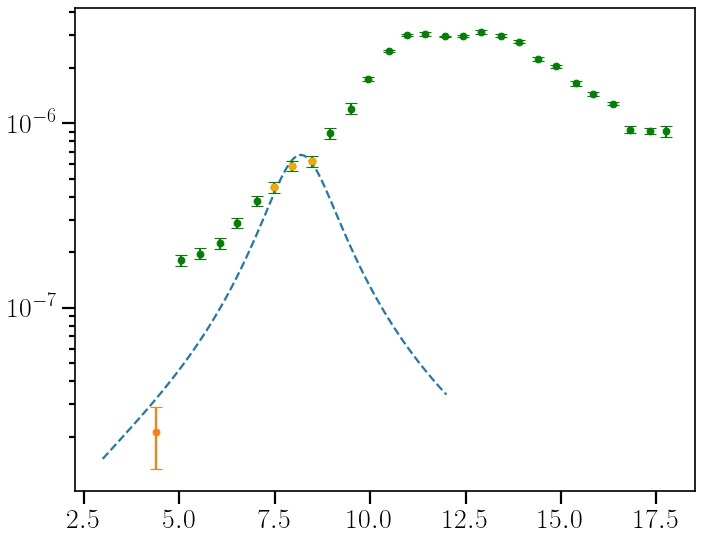

 FCN=4.50526 FROM HESSE     STATUS=OK             16 CALLS         179 TOTAL
                     EDM=3.5569e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Gamma_pyg2   1.78264e+00   1.82761e-01   6.96853e-06   2.67483e-03
   2  E_pyg2       8.23625e+00   6.53104e-02   1.06875e-05  -8.90083e-04
   3  sigma_pyg2   6.38798e+01   3.40495e+00   5.59949e-04   1.96596e-05


In [28]:
#START VALUES pygmy 2/spinflip resonance
E_pyg2 = 7.0 #Pygmy centroid (MeV) - this is from systematics (taken from TALYS)
Gamma_pyg2 = 1.5 #Width (MeV)
sigma_pyg2 = 20.0 #peak cross section (mb)

parameter_array_M1 = np.asarray([Gamma_pyg2, E_pyg2, sigma_pyg2])

xmin_pyg2 = 3.
xmax_pyg2 = 12.
no_of_parameters_pyg2 = 3
fit_strength_M1 = TF1('fit_strength_M1', FitPygmy, xmin_pyg2, xmax_pyg2, no_of_parameters_pyg2)
fit_strength_M1.SetParameters(parameter_array_M1)
fit_strength_M1.SetParLimits(0, 0.1, 10.) #to remain positive/physical
fit_strength_M1.SetParNames('Gamma_pyg2', 'E_pyg2', 'sigma_pyg2')

#Kopecky data
fEx = np.asarray([12.14E-08])
fEerr = np.asarray([3.92E-08])
fEene = np.asarray([3.9])
fEeneerr = np.asarray([0.00])
fMx = np.asarray([2.11E-08])
fMerr = np.asarray([0.78E-08])
fMene = np.asarray([4.4])
fMeneerr = np.asarray([0.0])
fE = TGraphErrors(1,fEene,fEx,fEeneerr,fEerr)
fM = TGraphErrors(1,fMene,fMx,fEeneerr,fMerr)

#Making TGraphErrors of reduced Berman-data
gsf_exp1_reduced = gsf_exp1[5:8]
gsf_exp1_error_reduced = gsf_exp1_error[5:8]
energy_exp1_reduced = energy_exp1[5:8]
energy_exp1_error_reduced = np.zeros(len(energy_exp1_reduced))

berman_233_gdrexp_reduced = TGraphErrors(len(energy_exp1_reduced), np.asarray(energy_exp1_reduced), 
                                np.asarray(gsf_exp1_reduced), np.asarray(energy_exp1_error_reduced), 
                                np.asarray(gsf_exp1_error_reduced))


#fitting to M1 data
M1_data = TMultiGraph()
M1_data.Add(fM)
M1_data.Add(berman_233_gdrexp_reduced) #adding reduced berman data to the fit
M1_data.Fit(fit_strength_M1, 'RM+')

#prepare for plotting
fitted_parameters_pyg2 = np.zeros(no_of_parameters_pyg2)
fitted_parameters_pyg2[0] = fit_strength_M1.GetParameter(0)
fitted_parameters_pyg2[1] = fit_strength_M1.GetParameter(1)
fitted_parameters_pyg2[2] = fit_strength_M1.GetParameter(2)
x_plot_pyg2 = [np.linspace(xmin_pyg2, xmax_pyg2, 100)]
y_plot_pyg2 = FitPygmy(x_plot_pyg2, fitted_parameters_pyg2)

#plotting, together with berman data
fig, ax = plt.subplots()

ax.plot(x_plot_pyg2[0], y_plot_pyg2, '--', label='Pyg2 Resonance/M1')

ax.errorbar(x=fMene, y=fMx, yerr=fMerr, xerr=None, fmt='o', label="$U^{234}(n,\gamma)$ M1, Kopecky")
#Experimental: Berman 1986
ax.errorbar(energy_exp1, gsf_exp1, yerr=gsf_exp1_error, x_err=None, fmt="o", color='green', label="$U^{234}(\gamma,n)$ Berman (1986)")
ax.errorbar(energy_exp1_reduced, gsf_exp1_reduced, xerr=None, yerr=None, fmt='o', color='orange')

ax.set_yscale('log')
fig.show()

Fitting pyg1 resonance to reduced OmPy data

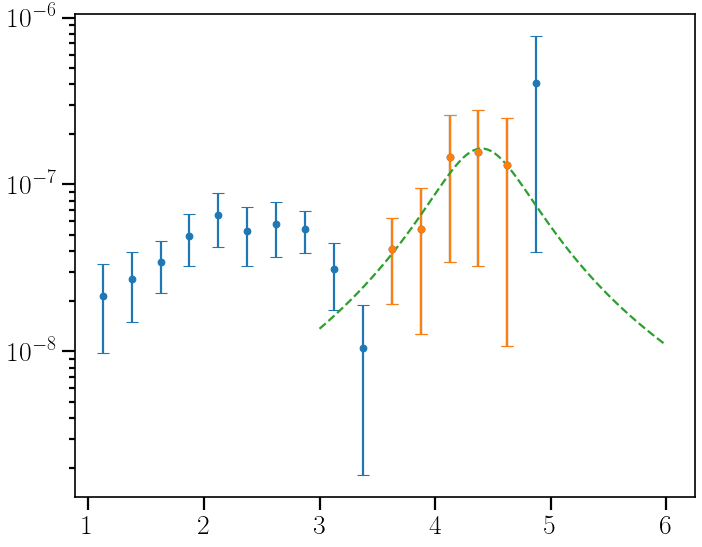

 FCN=0.174719 FROM HESSE     STATUS=OK             16 CALLS         155 TOTAL
                     EDM=9.376e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Gamma_pyg1   8.61861e-01   6.93052e-01   2.54628e-05  -6.48896e-04
   2  E_pyg1       4.42280e+00   3.55870e-01   1.65284e-05   4.08983e-03
   3  sigma_pyg1   8.35381e+00   5.08049e+00   2.86456e-04  -1.77612e-04


In [29]:
#START VALUES pygmy resonance 1
E_pyg1 = 4.5 # Pygmy centroid (MeV)
Gamma_pyg1 = 0.4 # Width (MeV)
sigma_pyg1 = 5.0 #peak cross section (mb)

#TGraphErrors of reduced OmPy data
gsf_ompy_median_reduced = gsf_ompy_median[10:-1]
gsf_ompy_error_reduced = gsf_ompy_error[10:-1]
energy_gsf_ompy_reduced = energy_gsf_ompy[10:-1]
energy_gsf_ompy_error_reduced = np.zeros(len(energy_gsf_ompy_reduced))
gsf_ompy_reduced = TGraphErrors(len(energy_gsf_ompy_reduced), np.asarray(energy_gsf_ompy_reduced), np.asarray(gsf_ompy_median_reduced), np.asarray(energy_gsf_ompy_error_reduced), np.asarray(gsf_ompy_error_reduced))

#defining  reduced OmPy Data
OmPy_reduced_data = TMultiGraph()
OmPy_reduced_data.Add(gsf_ompy_reduced, "P")

parameter_array_pyg1 = np.asarray([Gamma_pyg1, E_pyg1, sigma_pyg1])

xmin_pyg1 = 3
xmax_pyg1 = 6
no_of_parameters_pyg1 = 3
fit_strength_pyg1 = TF1('fit_strength_pyg1', FitPygmy, xmin_pyg1, xmax_pyg1, no_of_parameters_pyg1)
fit_strength_pyg1.SetParameters(parameter_array_pyg1)
fit_strength_pyg1.SetParNames('Gamma_pyg1', 'E_pyg1', 'sigma_pyg1')
#fit_strength_pyg1.FixParameter(1, E_pyg1)
#fit_strength_pyg1.FixParameter(0, Gamma_pyg1)
OmPy_reduced_data.Fit(fit_strength_pyg1, 'RM+')
#OmPy_data.Fit(fit_strength_pyg1, 'RM+')



fig, ax = plt.subplots()
ax.errorbar(x=energy_gsf_ompy, y=gsf_ompy_median, yerr=gsf_ompy_error, marker='o', linestyle='', label='$U^{233}(\\alpha,\\alpha^*)$ OmPy')
ax.errorbar(x=energy_gsf_ompy_reduced, y=gsf_ompy_median_reduced, yerr=gsf_ompy_error_reduced, marker='o', linestyle='', label='$U^{233}(\\alpha,\\alpha^*)$ OmPy')

#plotting fit of Pyg1
no_of_parameters_pyg1 = 3
fitted_parameters_pyg1 = np.zeros(no_of_parameters_pyg1)
fitted_parameters_pyg1[0] = fit_strength_pyg1.GetParameter(0)
fitted_parameters_pyg1[1] = fit_strength_pyg1.GetParameter(1)
fitted_parameters_pyg1[2] = fit_strength_pyg1.GetParameter(2)
x_plot_pyg1 = [np.linspace(xmin_pyg1, xmax_pyg1, 100)]
y_plot_pyg1 = FitPygmy(x_plot_pyg1, fitted_parameters_pyg1)
ax.plot(x_plot_pyg1[0], y_plot_pyg1, '--', label='Pyg1 Resonance')


ax.set_yscale('log')
fig.show()

Fitting Scissors Resonance to OmPy data

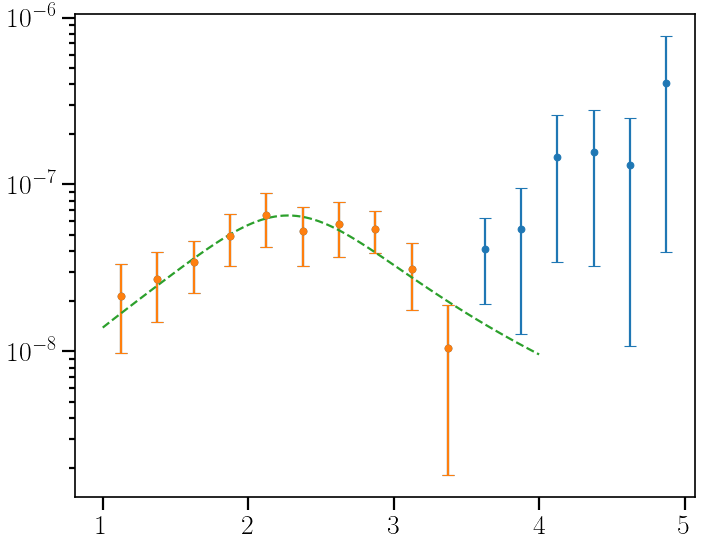

 FCN=2.80406 FROM HESSE     STATUS=OK             16 CALLS         112 TOTAL
                     EDM=8.8283e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Gamma_SR     1.49405e+00   3.78078e-01   4.11606e-05  -2.13072e-03
   2  E_SR         2.39019e+00   1.15400e-01   1.89511e-05   9.61717e-03
   3  sigma_SR     1.75165e+00   3.60878e-01   4.17208e-05  -4.18875e-03


In [30]:
#START VALUES Pygmy scissors resonance
E_SR = 2.5 #Pygmy centroid (MeV) - this is from systematics (taken from TALYS)
Gamma_SR = 1.5 #Width (MeV)
sigma_SR = 1.0 #peak cross section (mb)
parameter_array_SR = np.asarray([Gamma_SR, E_SR, sigma_SR])

#TGraphErrors of OmPy data
energy_gsf_ompy_error = np.zeros(len(energy_gsf_ompy))
gsf_ompy = TGraphErrors(len(energy_gsf_ompy), np.asarray(energy_gsf_ompy), np.asarray(gsf_ompy_median), np.asarray(energy_gsf_ompy_error), np.asarray(gsf_ompy_error))

#TGraphErrors of reduced OmPy data
gsf_ompy_median_reduced = gsf_ompy_median[0:10]
gsf_ompy_error_reduced = gsf_ompy_error[0:10]
energy_gsf_ompy_reduced = energy_gsf_ompy[0:10]
energy_gsf_ompy_error_reduced = np.zeros(len(energy_gsf_ompy_reduced))
gsf_ompy_reduced = TGraphErrors(len(energy_gsf_ompy_reduced), np.asarray(energy_gsf_ompy_reduced), np.asarray(gsf_ompy_median_reduced), np.asarray(energy_gsf_ompy_error_reduced), np.asarray(gsf_ompy_error_reduced))


#defining OmPy Data
OmPy_data_reduced = TMultiGraph()
OmPy_data_reduced.Add(gsf_ompy_reduced, "P")

#Fitting the Scissors resonance
xmin_SR = 1
xmax_SR = 4
no_of_parameters_SR = 3
fit_strength_SR = TF1('fit_strength_SR', FitPygmy, xmin_SR, xmax_SR, no_of_parameters_SR)
fit_strength_SR.SetParameters(parameter_array_SR)
fit_strength_SR.SetParNames('Gamma_SR', 'E_SR', 'sigma_SR')
#fit_strength_SR.FixParameter(1, E_SR)
#fit_strength_SR.SetParLimits(0, 0.1, 10)
#fit_strength_SR.FixParameter(0, Gamma_SR)
OmPy_data_reduced.Fit(fit_strength_SR, 'RM+')



fig, ax = plt.subplots()
ax.errorbar(x=energy_gsf_ompy, y=gsf_ompy_median, yerr=gsf_ompy_error, marker='o', linestyle='', label='$U^{233}(\\alpha,\\alpha^*)$ OmPy')
ax.errorbar(x=energy_gsf_ompy_reduced, y=gsf_ompy_median_reduced, yerr=gsf_ompy_error_reduced, marker='o', linestyle='', label='$U^{233}(\\alpha,\\alpha^*)$ OmPy')

#plotting fit of Scissors Resonance
fitted_parameters_SR = np.zeros(3)
fitted_parameters_SR[0] = fit_strength_SR.GetParameter(0)
fitted_parameters_SR[1] = fit_strength_SR.GetParameter(1)
fitted_parameters_SR[2] = fit_strength_SR.GetParameter(2)
x_plot_SR = [np.linspace(xmin_SR, xmax_SR, 100)]
y_plot_SR = FitPygmy(x_plot_SR, fitted_parameters_SR)
ax.plot(x_plot_SR[0], y_plot_SR, '--', label="Scissors Resonance")

ax.set_yscale('log')
fig.show()


Fitting strength function with PyROOT

In [31]:
#getting fitted parameters for final fit
Gamma_r_GLo1 = fit_strength_E1.GetParameter(0)
E_r_GLo1 = fit_strength_E1.GetParameter(1)
sigma_r_GLo1 = fit_strength_E1.GetParameter(2)

Gamma_r_GLo2 = fit_strength_E1.GetParameter(3)
E_r_GLo2 = fit_strength_E1.GetParameter(4)
sigma_r_GLo2 = fit_strength_E1.GetParameter(5)

T_f = fit_strength_E1.GetParameter(6)

Gamma_pyg2 = fit_strength_M1.GetParameter(0)
E_pyg2 = fit_strength_M1.GetParameter(1)
sigma_pyg2 = fit_strength_M1.GetParameter(2)

Gamma_SR = fit_strength_SR.GetParameter(0)
E_SR = fit_strength_SR.GetParameter(1)
sigma_SR = fit_strength_SR.GetParameter(2)

Gamma_pyg1 = fit_strength_pyg1.GetParameter(0)
E_pyg1 = fit_strength_pyg1.GetParameter(1)
sigma_pyg1 = fit_strength_pyg1.GetParameter(2)

xmin_tot = 1.1
xmax_tot = 18.
no_of_parameters_tot = 16
fit_strength = TF1('fit_strength', FitFunctionStrength, xmin_tot, xmax_tot, no_of_parameters_tot)
parameter_array_full = np.asarray([Gamma_r_GLo1, E_r_GLo1, sigma_r_GLo1,
                                  Gamma_r_GLo2, E_r_GLo2, sigma_r_GLo2, T_f,
                                  Gamma_pyg1, E_pyg1, sigma_pyg1,
                                  Gamma_pyg2, E_pyg2, sigma_pyg2,
                                  Gamma_SR, E_SR, sigma_SR])

fit_strength.SetParameters(parameter_array_full)
fit_strength.SetParNames('Gamma_GLo1', 'E_GLo1', 'sigma_GLo1',
                        'Gamma_GLo2', 'E_GLo2', 'sigma_GLo2', 'T_f',
                            'Gamma_pyg1', 'E_pyg1', 'sigma_pyg1',
                            'Gamma_pyg2') #Only able to set 11 parameter names at once...
fit_strength.SetParName(11, 'E_pyg2')
fit_strength.SetParName(12, 'sigma_pyg2')
fit_strength.SetParName(13, 'Gamma_SR')
fit_strength.SetParName(14, 'E_SR')
fit_strength.SetParName(15, 'sigma_SR')

#fix E1 parameters
fit_strength.FixParameter(0, Gamma_r_GLo1)
fit_strength.FixParameter(1, E_r_GLo1)
fit_strength.FixParameter(2, sigma_r_GLo1)
fit_strength.FixParameter(3, Gamma_r_GLo2)
fit_strength.FixParameter(4, E_r_GLo2)
fit_strength.FixParameter(5, sigma_r_GLo2)
fit_strength.SetParLimits(6, 0.01, 0.02)

#fix/limit pyg1 parameters
#fit_strength.FixParameter(7, Gamma_pyg1)
fit_strength.FixParameter(8, E_pyg1)
#fit_strength.FixParameter(9, sigma_pyg1)
#fit_strength.SetParLimits(9, 0.1, 15)

#fix/limit pyg2 parameters
#fit_strength.FixParameter(11, E_pyg2)
fit_strength.FixParameter(10, Gamma_pyg2)
#fit_strength.SetParLimits(10, 0, )
#fit_strength.FixParameter(12, sigma_pyg2)
fit_strength.SetParLimits(12, 0, 100)

#fix/limit SR parameters
#fit_strength.FixParameter(13, Gamma_SR)
fit_strength.SetParLimits(13, 1.0, 1.2)
#fit_strength.FixParameter(14, E_SR)
#fit_strength.FixParameter(15, sigma_SR)
#fit_strength.SetParLimits(15, 0.1, 15)


#Defining all data (Berman and OmPy)
OmPy_and_GDR_data = TMultiGraph()
OmPy_and_GDR_data.Add(berman_233_gdrexp, "P")
OmPy_and_GDR_data.Add(gsf_ompy, "P")
OmPy_and_GDR_data.Fit(fit_strength, 'S')

 FCN=151.302 FROM HESSE     STATUS=FAILED          3 CALLS         766 TOTAL
                     EDM=1.2836e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Gamma_GLo1   3.00263e+00     fixed    
   2  E_GLo1       1.13334e+01     fixed    
   3  sigma_GLo1   3.05361e+02     fixed    
   4  Gamma_GLo2   3.50471e+00     fixed    
   5  E_GLo2       1.37140e+01     fixed    
   6  sigma_GLo2   3.15135e+02     fixed    
   7  T_f          1.93855e-02   6.14045e-04  -0.00000e+00   0.00000e+00
   8  Gamma_pyg1   6.50547e-01   8.22332e-02  -4.01843e-05   7.28192e-04
   9  E_pyg1       4.42280e+00     fixed    
  10  sigma_pyg1   9.55105e+00   1.97829e+00  -1.19199e-03  -1.20534e-05
  11  Gamma_pyg2   1.78264e+00     fixed    
  12  E_pyg2       7.26404e+00   8.63314e-02  -7.70616e-05  -1.25106e-03
  13  sigma_pyg2   1.93729e+01   1.

Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 


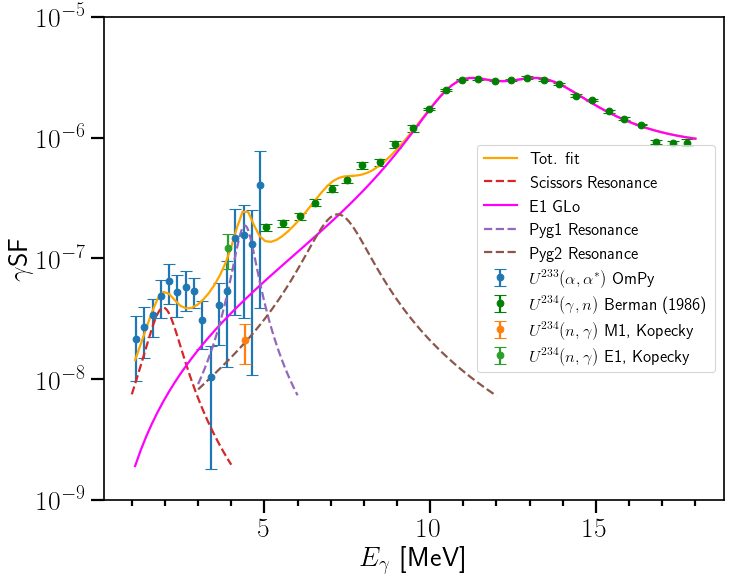

In [32]:
fig, ax = plt.subplots()

#This experiment
ax.errorbar(x=energy_gsf_ompy, y=gsf_ompy_median, yerr=gsf_ompy_error, marker='o', linestyle='', label='$U^{233}(\\alpha,\\alpha^*)$ OmPy')

#Experimental: Berman 1986
ax.errorbar(energy_exp1, gsf_exp1, yerr=gsf_exp1_error, x_err=None, fmt="o", color='green', label="$U^{234}(\gamma,n)$ Berman (1986)")

#Experimental: Kopecky
ax.errorbar(x=fMene, y=fMx, yerr=fMerr, xerr=None, fmt='o', label="$U^{234}(n,\gamma)$ M1, Kopecky")
ax.errorbar(x=fEene, y=fEx, yerr=fEerr, xerr=None, fmt='o', label="$U^{234}(n,\gamma)$ E1, Kopecky")

#Plotting total fit
fitted_parameters = np.zeros(no_of_parameters_tot)
for i in range(no_of_parameters_tot):
    fitted_parameters[i] = fit_strength.GetParameters()[i]
x_plot = [np.linspace(xmin_tot, xmax_tot, 100)]
y_plot = FitFunctionStrength(x_plot, fitted_parameters)
ax.plot(x_plot[0], y_plot, color='orange', label='Tot. fit')


#plotting fit of Scissors Resonance
fitted_parameters_SR = np.zeros(3)
fitted_parameters_SR[0] = fitted_parameters[13]
fitted_parameters_SR[1] = fitted_parameters[14]
fitted_parameters_SR[2] = fitted_parameters[15]
x_plot_SR = [np.linspace(xmin_SR, xmax_SR, 100)]
y_plot_SR = FitPygmy(x_plot_SR, fitted_parameters_SR)
ax.plot(x_plot_SR[0], y_plot_SR, '--', label="Scissors Resonance")

#Plotting fit of GDR
fitted_parameters_E1 = np.zeros(no_of_parameters_GDR)
for i in range(no_of_parameters_GDR):
    fitted_parameters_E1[i] = fit_strength_E1.GetParameters()[i]
x_plot_E1 = [np.linspace(xmin_GDR, xmax_GDR, 100)]
x_plot_E1 = [np.linspace(1.1, 18, 100)]
y_plot_E1 = FitFunctionE1(x_plot_E1, fitted_parameters_E1)
ax.plot(x_plot_E1[0], y_plot_E1, color='magenta', label='E1 GLo')

#plotting fit of Pyg1
no_of_parameters_pyg1 = 3
fitted_parameters_pyg1 = np.zeros(no_of_parameters_pyg1)
fitted_parameters_pyg1[0] = fitted_parameters[7]
fitted_parameters_pyg1[1] = fitted_parameters[8]
fitted_parameters_pyg1[2] = fitted_parameters[9]
x_plot_pyg1 = [np.linspace(xmin_pyg1, xmax_pyg1, 100)]
y_plot_pyg1 = FitPygmy(x_plot_pyg1, fitted_parameters_pyg1)
ax.plot(x_plot_pyg1[0], y_plot_pyg1, '--', label='Pyg1 Resonance')

#plotting fit of Pyg2
fitted_parameters_pyg2 = np.zeros(no_of_parameters_pyg2)
fitted_parameters_pyg2[0] = fitted_parameters[10]
fitted_parameters_pyg2[1] = fitted_parameters[11]
fitted_parameters_pyg2[2] = fitted_parameters[12]
x_plot_pyg2 = [np.linspace(xmin_pyg2, xmax_pyg2, 100)]
y_plot_pyg2 = FitPygmy(x_plot_pyg2, fitted_parameters_pyg2)
ax.plot(x_plot_pyg2[0], y_plot_pyg2, '--', label='Pyg2 Resonance')



ax.set_ylim(1e-9, 1e-5)
#ax.set_xlim(0, 7)
ax.set_yscale('log')
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_xlabel('$E_\gamma$  [MeV]')
ax.set_ylabel('$\gamma$SF')
ax.legend(fontsize=15)

fig.show()

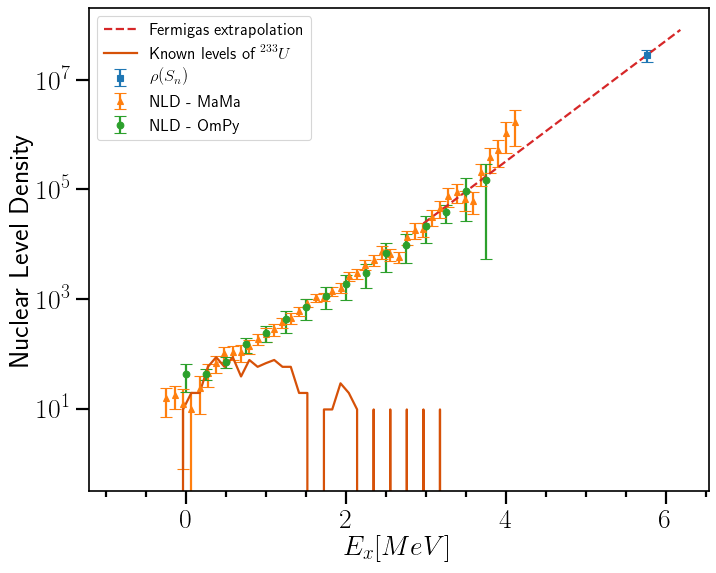

In [33]:
fig, ax = plt.subplots()

#plotting neutron separation energy
ax.errorbar(x=Sn, y=rhoSn, yerr=rhoSn_error, marker='s', linestyle='', label='$\\rho(S_n)$')

#plotting mama nld
ax.errorbar(x=energy_nld_om[:len(nld_om)], y=nld_om, yerr=nld_om_error, marker='^', linestyle='', label='NLD - MaMa')

#plotting ompy nld
ax.errorbar(x=ompyDataFrame.iloc[:,13], y=ompyDataFrame.iloc[:,14], yerr=ompyDataFrame.iloc[:,15], marker='o', linestyle='', label = 'NLD - OmPy')

#plotting fermigas extrapolation from mama
ax.plot(energy_nld_om[n0_CT:n1_CT], fermigas[n0_CT:n1_CT], linestyle='--', label='Fermigas extrapolation')

#plotting discrete levels
plt.plot(energy_nld_om[:len(discrete_levels)], discrete_levels, color="#D65108", label='Known levels of $^{233}U$')

ax.legend(fontsize=15)
ax.set_yscale('log')
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_xlabel('$E_x[MeV]$')
ax.set_ylabel('Nuclear Level Density')
#ax.set_xlim(-1, 10)
#ax.set_ylim(1e1, 1e10)

fig.show()


In [34]:
#Script to clean up the old OmPy runs, to make the data_for_analysis.csv fit for this notebook

def getMedianQuantile(func):
    "Estimating the 68% confidence interval"
    func = pd.DataFrame(func)
    func_median = pd.DataFrame.median(func)
    func_error_low = func.quantile(0.16)
    func_error_high = func.quantile(0.84)
    func_error = func_error_high - func_error_low
    return func_median, func_error

def read_write_ompy(path):
    """
    Read data from saved OmPy results.
    Results to file
    Calculate median and error of results
    Save results to file
    """
    
    
    infile = open(path+'README.txt', 'r')
    for line in infile:
        values = line.split()
        if not values:
            continue
        if values[0] == 'keV':
            kev_per_bin_wish = float(values[3])
            continue
        if values[0] == 'Ex_min:':
            Ex_min = float(values[1])
            continue
        if values[0] == 'Ex_max:':
            Ex_max = float(values[1])
            continue
        if values[0] == 'Eg_min:':
            Eg_min = float(values[1])
            continue
        if values[0] == 'Eg_max:':
            Eg_max = float(values[1])
            continue
        if values[0] == 'Gg:':
            Gg = float(values[1])
            Gg_err = float(values[3])
            continue
        if values[0] == 'rhoSn:':
            rhoSn = float(values[1])
            rhoSn_err = float(values[3])
    infile.close()
    
    parameter_dict = {'keV_per_bin': kev_per_bin_wish, 'Ex_min': Ex_min, 'Ex_max': Ex_max, 'Eg_min': Eg_min, 'Eg_max': Eg_max, 'Gg': Gg, 'Gg_err': Gg_err, 'rhoSn': rhoSn, 'rhoSn_err': rhoSn_err}
    dataFrame1 = pd.DataFrame(parameter_dict, index=[0])
    
    energy_gsf = pd.read_csv(path+'data/gsf_0.txt', sep=" ", header=None, skiprows=[0, -1])[0]*1e-3
    energy_nld = pd.read_csv(path+'data/nld_0.txt', sep=" ", header=None, skiprows=[0, -1])[0]*1e-3
    gsf = []
    nld = []
    
    for i in range(100-1):
        gsf.append(pd.read_csv(path+'data/gsf_%.0i.txt'%i, sep=" ", header=None, skiprows=[0, -1])[1])
        nld.append(pd.read_csv(path+'data/nld_%.0i.txt'%i, sep=" ", header=None, skiprows=[0, -1])[1])
    
    gsf_median, gsf_error = getMedianQuantile(gsf)
    nld_median, nld_error = getMedianQuantile(nld)
    
    ompy_dict = {'E_gamma': energy_gsf, 'gSF-median':gsf_median, 'gSF-error': gsf_error, 'E_x': energy_nld, 'NLD-median': nld_median, 'NLD-error': nld_error}
    
    #write to file
    dataFrame2 = pd.DataFrame(ompy_dict)
    dataFrame = pd.concat([dataFrame1, dataFrame2])
    dataFrame.to_csv(path+'data_for_analysis.csv')

#read_write_ompy('../analysis/OmPy/normalized_data/U233_INPUT_DATE/')
